# Introduction to Convolutional Neural Networks ( CNN )

## Applying CNN to the Fashion_MNIST dataset 

A [convolution] is the process of applying a filter (“kernel”) to an image. 

[Max pooling] is the process of reducing the size of the image through downsampling.

# Import relevant libraries

In [1]:
# Helper Libraries 
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow Datasets
import tensorflow_datasets as tfds

# Load Data

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Mapping lables to Class names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

# Data Exploration

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


# Preprocessing

In [5]:
# Each image consists of pixels ranging from 0-255
# For our model to function properly , we need to normalize the range t0 0-1

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

# Lets take a look at our preprocessed Data 

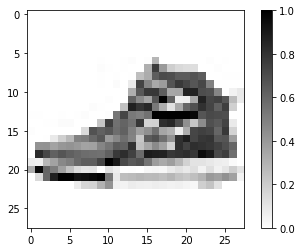

In [6]:
# Take a single image, and remove the color dimension by reshaping
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

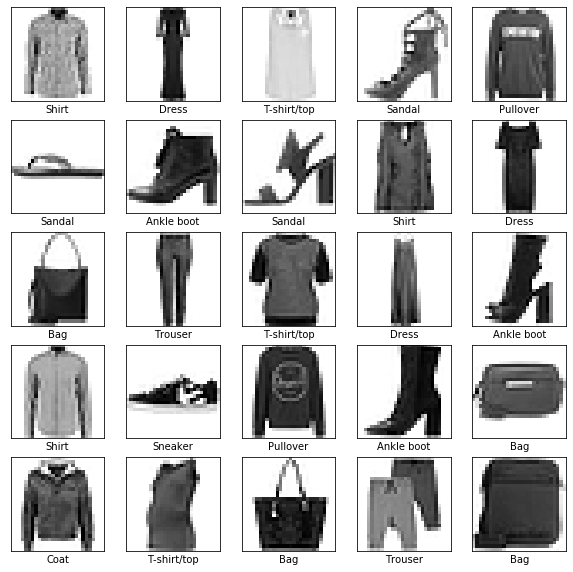

In [7]:
# Now lets display the first 25 images from our training data set
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

# Build the Model

In [8]:
# First Layer - so this layer creates 32 convoluted images of the same size as input
# Second Layer - The 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2
# Third Layer - The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs
# Fourth Layer - outputs are again reduced in size by a MaxPooling2D layer
# Output Layer - A 128-neuron layer
# Output Layer -  A 10-node softmax layer

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile Model

In [9]:
# Loss function — An algorithm for measuring how far the model's outputs are from the desired output. 
#  The goal of training is this measures loss.
# Optimizer —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy,
# the fraction of the images that are correctly classified

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the Model

In [10]:
# Useful information !!!
# 1.Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training)
# 2.The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
# 3.And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4005 - accuracy: 0.8539
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2583 - accuracy: 0.9048
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2145 - accuracy: 0.9217
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1830 - accuracy: 0.9321
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1549 - accuracy: 0.9426
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1357 - accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1106 - accuracy: 0.9591
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0972 - accuracy: 0.9640
Epoch 9/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0809 - accuracy: 0.9694
Epoch 10/10
1875/1875 [====================

# Evaluate accuracy

In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.3146 - accuracy: 0.9193
Accuracy on test dataset: 0.9193


# Make predictions and explore

In [12]:

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

# Here, the model has predicted the probability of each label for each image in the testing set
# Lets take a look at the shape and then the first prediction
predictions.shape

(32, 10)

In [13]:
# A prediction is an array of 10 numbers. 
# These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 
# We can see which label has the highest confidence value

predictions[0]

array([1.9958373e-09, 8.0842312e-12, 1.0503609e-04, 2.1161257e-09,
       5.4238193e-02, 4.6008850e-11, 9.4565624e-01, 4.4396356e-10,
       7.9324622e-13, 5.7621969e-07], dtype=float32)

In [14]:
# We convert the predictions into an easy to read range using the argmax function
# 6 corresponds to shirt on the test lables
np.argmax(predictions[0])

6

In [15]:
test_labels[0]

6

# plot images with predictions

In [16]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

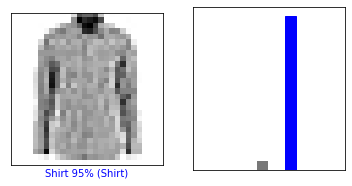

In [18]:
# Let's look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

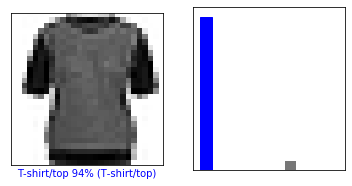

In [19]:
# Let's look at the 12th image, predictions, and prediction array.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

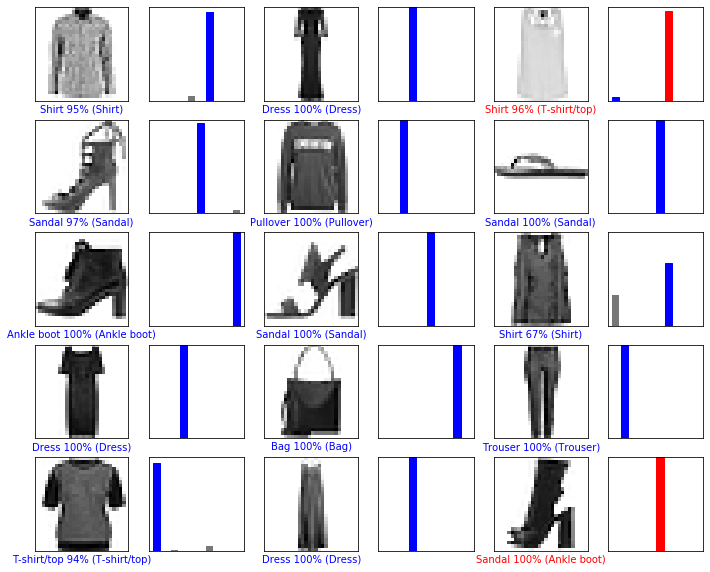

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# Use Trained Model to make prediction on test images

In [21]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [22]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.9958373e-09 8.0842008e-12 1.0503618e-04 2.1161297e-09 5.4238141e-02
  4.6008850e-11 9.4565624e-01 4.4396356e-10 7.9324627e-13 5.7622077e-07]]


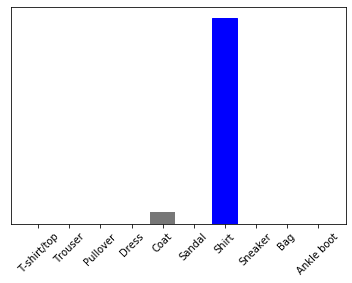

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

6